In [4]:
from one.api import ONE
from brainbox.io.one import SpikeSortingLoader
from iblatlas.atlas import AllenAtlas as ba
import numpy as np
from passiveGabor_VIS import *
from brainbox.population.decode import get_spike_counts_in_bins


In [5]:
results = load_results('results.json')
ONE.setup(base_url='https://openalyx.internationalbrainlab.org', silent=True)
one = ONE(password='international')
eids = []
for r in results:
    eids.append(r['eid'])
eid = eids[0]

Loaded 1 results from results.json
Connected to https://openalyx.internationalbrainlab.org as user "intbrainlab"


In [6]:
trials = one.load_object(eid, 'trials', collection = 'alf')
print(trials.keys())         # keys in trials object (intervals, goCue_times, stimOn_times, etc.)
for k in trials.keys():
    print(k, type(trials[k]), getattr(trials[k], 'shape', None))

dict_keys(['goCueTrigger_times', 'stimOff_times', 'probabilityLeft', 'response_times', 'goCue_times', 'feedback_times', 'stimOn_times', 'contrastRight', 'contrastLeft', 'choice', 'feedbackType', 'rewardVolume', 'firstMovement_times', 'intervals'])
goCueTrigger_times <class 'numpy.ndarray'> (533,)
stimOff_times <class 'numpy.ndarray'> (533,)
probabilityLeft <class 'numpy.ndarray'> (533,)
response_times <class 'numpy.ndarray'> (533,)
goCue_times <class 'numpy.ndarray'> (533,)
feedback_times <class 'numpy.ndarray'> (533,)
stimOn_times <class 'numpy.ndarray'> (533,)
contrastRight <class 'numpy.ndarray'> (533,)
contrastLeft <class 'numpy.ndarray'> (533,)
choice <class 'numpy.ndarray'> (533,)
feedbackType <class 'numpy.ndarray'> (533,)
rewardVolume <class 'numpy.ndarray'> (533,)
firstMovement_times <class 'numpy.ndarray'> (533,)
intervals <class 'numpy.ndarray'> (533, 2)


In [7]:
print(trials['contrastLeft'])  # contrast values for left stimulus on each trial

[   nan    nan    nan 0.125  0.25   1.        nan 0.        nan 0.125
    nan    nan 1.     0.125  1.        nan 1.     0.25   0.25      nan
 0.25      nan    nan 0.0625 0.0625    nan 0.0625    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan 0.125     nan
    nan 0.125  0.     0.25   0.25   1.        nan 0.25      nan    nan
    nan    nan    nan 0.125  0.0625    nan    nan    nan 0.125  1.
 0.125  0.125     nan 0.25   0.125     nan    nan 0.0625 1.     0.0625
    nan 0.        nan 0.0625 0.25      nan 0.0625 0.0625 1.        nan
    nan 1.     1.     0.0625    nan 0.     0.        nan    nan 0.25
 0.125  0.0625    nan    nan    nan    nan    nan    nan 0.25      nan
    nan 1.        nan 0.25      nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan 0.     0.0625    nan 1.     0.125  0.25
 1.     0.25   0.125     nan    nan 0.        nan    nan 0.     0.125
    nan 0.25      nan 1.     0.0625 0.25      nan 0.25   0.0625 1.
    nan 0.        na

In [8]:
print(trials['contrastRight']) # contrast values for right stimulus on each trial

[1.     1.     0.0625    nan    nan    nan 0.0625    nan 1.        nan
 0.0625 0.25      nan    nan    nan 0.        nan    nan    nan 0.125
    nan 0.125  1.        nan    nan 0.25      nan 0.125  1.     0.0625
 0.0625 0.125  0.25   0.125  0.25   0.125  0.25   0.        nan 0.0625
 0.0625    nan    nan    nan    nan    nan 0.125     nan 0.25   1.
 0.0625 0.25   0.125     nan    nan 0.0625 0.0625 1.        nan    nan
    nan    nan 0.        nan    nan 0.     1.        nan    nan    nan
 0.        nan 1.        nan    nan 1.        nan    nan    nan 0.25
 0.25      nan    nan    nan 0.125     nan    nan 0.125  0.25      nan
    nan    nan 1.     1.     0.25   0.0625 1.     1.        nan 0.0625
 0.125     nan 0.25      nan 0.125  0.25   0.125  0.125  0.     1.
 0.     0.     1.     1.        nan    nan 0.0625    nan    nan    nan
    nan    nan    nan 0.     0.0625    nan 0.25   0.0625    nan    nan
 0.25      nan 0.25      nan    nan    nan 0.125     nan    nan    nan
 0.125     nan 0.

0 nan nan


In [13]:
print(trials['stimOn_times'][:10])  # first 10 stimulus on times 
print(trials['stimOff_times'][:10]) # first 10 stimulus off times
durs = trials['stimOff_times'] - trials['stimOn_times']
print(durs[:10])                 # stimulus durations for first 10 trials

[101.91834048 121.02249654 127.72232649 132.60153852 147.91737345
 167.61733659 176.93857104 194.75002305 200.77132086 206.38782582]
[119.41792368 124.7678553  131.03892813 141.00543138 164.35496286
 175.43402151 189.78815262 199.29990135 203.24997297 213.44991954]
[17.4995832   3.74535876  3.31660164  8.40389286 16.43758941  7.81668492
 12.84958158  4.5498783   2.47865211  7.06209372]


In [19]:
from one.api import ONE
from brainbox.io.one import SpikeSortingLoader
from iblatlas.atlas import AllenAtlas as ba
import numpy as np
from passiveGabor_VIS import *
from brainbox.population.decode import get_spike_counts_in_bins
import matplotlib.pyplot as plt

results = load_results('results.json')
ONE.setup(base_url='https://openalyx.internationalbrainlab.org', silent=True)
one = ONE(password='international')
eids = []
for r in results:
    eids.append(r['eid'])
eid = eids[0]
def load_stim_firing_rates(eid, one=one, target_region = None):
    trials = one.load_object(eid, 'trials', collection='alf')
    stim_on = trials['stimOn_times']
    stim_off = trials['stimOff_times']

    valid = ~np.isnan(stim_on) & ~np.isnan(stim_off)
    stim_on = stim_on[valid]
    stim_off= stim_off[valid]
    for k in trials.keys():
        trials[k] = trials[k][valid]

    print(f"filtered out {np.sum(~valid)} trials with NaN stim times")

    stim_intervals = np.c_[stim_on, stim_off]
    pid = one.alyx.rest('insertions', 'list', session=eid)[0]['id']
    sl = SpikeSortingLoader(pid=pid, one=one, atlas=ba())
    spikes, clusters, channels = sl.load_spike_sorting()
    clusters = sl.merge_clusters(spikes, clusters, channels)

    counts, cluster_ids = get_spike_counts_in_bins(spikes['times'], spikes['clusters'], stim_intervals)
    counts = counts.T
    if target_region is not None:
        region_mask = clusters['acronym'] == target_region
        region_cluster_ids = clusters['cluster_id'][region_mask]
        region_cluster_ids = np.intersect1d(cluster_ids, region_cluster_ids)
    else: 
        region_cluster_ids = cluster_ids
    masked_clusters = np.isin(cluster_ids, region_cluster_ids)
    counts = counts[:, masked_clusters]
    fr_stim = counts / np.diff(stim_intervals, axis=1)
    return trials, fr_stim, masked_clusters

def get_signal_correlation(trials):
    cl = trials['contrastLeft']
    cr = trials['contrastRight']
    cl = np.nan_to_num(cl, nan=0.0)
    cr = np.nan_to_num(cr, nan=0.0)

    signed_contrast = cl - cr
    conditions = np.unique(signed_contrast)
    print(conditions)
    n_conditions = len(conditions)
    n_clusters = fr_stim.shape[1]

    fr_signal = np.zeros((n_conditions, n_clusters))

    for i, cond in enumerate(conditions):
        sel = (signed_contrast == cond)
        fr_signal[i, :] = np.mean(fr_stim[sel, :], axis=0)

    signal_corr = np.corrcoef(fr_signal.T)
    return signal_corr, fr_signal

def get_noise_correlation(trials, fr_stim, fr_signal):
    fr_noise = fr_stim.copy()
    cl = trials['contrastLeft']
    cr = trials['contrastRight']
    cl = np.nan_to_num(cl, nan=0.0)
    cr = np.nan_to_num(cr, nan=0.0)

    signed_contrast = cl - cr
    conditions = np.unique(signed_contrast)

    for i, cond in enumerate(conditions):
        sel = signed_contrast ==cond
        fr_noise[sel] -= fr_signal[i]
    noise_corr = np.corrcoef(fr_noise.T, rowvar=True)
    print(noise_corr.shape)
    return noise_corr

trials, fr_stim, region_cluster_ids = load_stim_firing_rates(eid, target_region='VISC5')
print(fr_stim)
print(fr_stim.shape) # (num_trials, num_clusters)
signal_correlation, fr_signal = get_signal_correlation(trials)

noise_correlation = get_noise_correlation(trials, fr_stim, fr_signal)


Loaded 1 results from results.json
Connected to https://openalyx.internationalbrainlab.org as user "intbrainlab"
filtered out 5 trials with NaN stim times


/opt/anaconda3/envs/ibl/lib/python3.13/site-packages/one/util.py:414: ALFWarning: No default revision for dataset alf/probe01/pykilosort/#2024-05-06#/clusters.metrics.pqt; using most recent
  warnings.warn(


[[ 0.34286531  0.          0.         ...  0.          0.
   0.        ]
 [ 1.3349856   0.          0.         ...  0.          0.
   0.        ]
 [ 0.6030269   0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 8.4623847   9.2316924   0.7693077  ...  0.7693077   0.
   0.        ]
 [15.13964945  7.56982473  0.         ...  2.27094742  0.75698247
   0.        ]
 [12.37747537  9.9019803   0.         ...  7.42648522  0.
   0.        ]]
(528, 77)
[-1.     -0.25   -0.125  -0.0625  0.      0.0625  0.125   0.25    1.    ]
(77, 77)


Text(0.5, 1.0, 'Signal correlation')

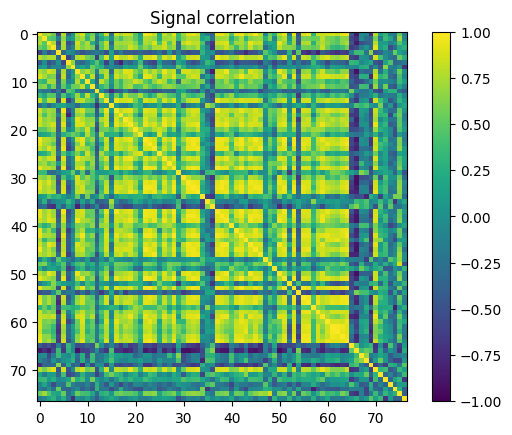

In [23]:
plt.imshow(signal_correlation, vmin=-1, vmax=1)
plt.colorbar()
plt.title("Signal correlation")

Text(0.5, 1.0, 'Noise correlation')

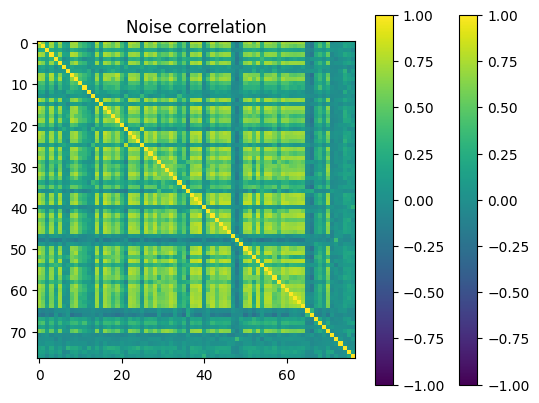

In [22]:
plt.imshow(noise_correlation, vmin=-1, vmax=1)
plt.colorbar()
plt.title("Noise correlation")

In [24]:
np.corrcoef(signal_correlation.flatten(), noise_correlation.flatten())

array([[1.        , 0.70863329],
       [0.70863329, 1.        ]])

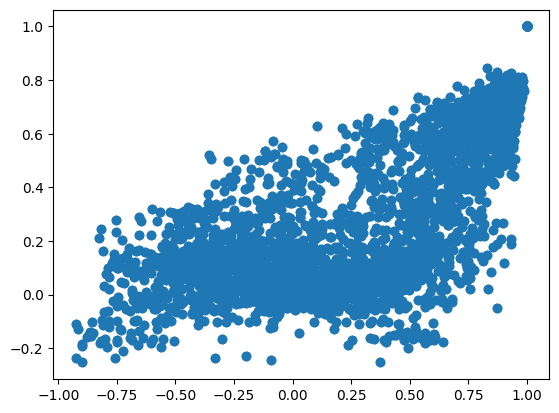

In [25]:
plt.scatter(signal_correlation.flatten(), noise_correlation.flatten())